<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

<!-- 9781484242667 -->

# <span style="color:red ">文字資料的特色
----
    1. 大部分都是真人「人工輸入」。
    2. 這是一種非結構化資料，可能意思一樣，但是說法，結構無限多種。
    3. 因為結構不定，所以資料長度就有很大的變化。
----


# <span style="color:red ">雖然文字資料是如此雜亂無章..但是
----
    我們發現:
    1. 長的文字內容比短的文字內容帶有更多資訊。
    2. 一段文字裡面出現的文字種類比較多，一定比一段只是不斷重複類似文字的內容帶有更多資訊。
       譬如:拉拉山買的水蜜桃香、甜、脆、汁多
            巷口買的水果香甜香甜
----
    所以，即使電腦看不懂文章，如果:
    1.我們可以知道一段文字裡面的字數
    2.我們可以知道一段文字裡面字的種類多寡
    3.用的字的長度。
    我們也可以輕易把文字資料做出篩選。


# <span style="color:red ">先來安裝一下-Natural Language Toolkit

In [1]:
!pip install nltk

# <span style="color:red ">把文字資料裡面的標點符號拿掉

In [2]:
#先創造一段文字資料
text=['This is introduction to NLP','It is likely to be useful,to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!','R is good langauage',
      'I like this book','I want more books like this']

#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
print(df)

                                               tweet
0                        This is introduction to NLP
1               It is likely to be useful,to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [3]:
#先做個小範例，把標點符號拿掉
#用re的方法
import re
s = "I. like. This book!"
#^挑反面
s1 = re.sub(r'[^\w\s]','',s)
s1

'I like This book'

In [ ]:
#第二種作法
#用String的方法

import string
s = "I. like. This book!"
#把所有的標點符號掃一次
for c in string.punctuation:
    s= s.replace(c,"")
s

In [ ]:
#直接對資料來處理
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet']

# <span style="color:red ">去掉比較沒有意義的字-Stop Words-停用詞
    人類語言中包含的功能詞，這些功能詞極其普遍，與其他詞相比，功能詞沒有什麼實際含義，比如'the'、'is'、'at'、'which'、'on'等
----
### [參考連結](https://www.itread01.com/content/1544637817.html)

In [ ]:
#先創造一段文字資料
text=['This is introduction to NLP','It is likely to be useful,to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!','R is good langauage',
      'I like this book','I want more books like this']
import pandas as pd
#把資料導成dataframe
df = pd.DataFrame({'tweet':text})
df

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')

#如果不懂join，可以搜尋一下
df['tweet'] = df['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['tweet']

# <span style="color:red ">文字標準化-Standardizing Text
-----
    文字會出現很多縮寫、簡寫的狀況，這些都會影響我們的分析，所以我們需要一個替換的方式

In [ ]:
lookup_dict = {'nlp':'natural language processing',
               'ur':'your', 
               "wbu" : "what about you"}

In [ ]:
import re
def text_std(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        word = re.sub(r'[^\w\s]','',word)
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)

    return new_words
                      

In [ ]:
#把要改變的文字挑出來改變
text_std("I like nlp it's ur choice")

### <span style="color:red "><小測驗>上面的function是把特別字挑出來翻出來，你可以幫我寫個Function，直接把整句話show出來嗎?

### <span style="color:red "><答案>

In [ ]:
def replaceToStd(input_text):
    words = input_text.split()
    new_words = []
    for word in words:
        if word.lower() in lookup_dict:
            word = lookup_dict[word.lower()]
            new_words.append(word)
        else:
            new_words.append(word)
            
    return " ".join(new_words)

replaceToStd("I like nlp it's ur choice")

In [ ]:
#方法二
def normalize(text):
    return text.replace('nlp','natural language processing')\
               .replace('ur','your')\
               .replace("wbu" , "what about you")
normalize("I like nlp it's ur choice")

# <span style="color:red ">tokenization
----
    把一段文章，分成一句一句話，然後用這些話來分析這段文章，這個稱為sentence tokenization. 
    把一句話，分成一個一個字，然後用這些字來分析這句話，稱為word tokenization
----

# <span style="color:red ">字詞拆解-Tokenizing Text

# <span style="color:red ">word tokenization

In [ ]:
#先創造一段文字資料
text=['This is introduction to NLP','It is likely to be useful,to people ',
      'Machine learning is the new electrcity',
      'There would be less hype around AI and more action going forward',
      'python is the best tool!','R is good langauage',
      'I like this book','I want more books like this']
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

In [ ]:
#第一種方法，用Python內建的
mystring = "My favorite animal is cat"
mystring.split()

In [ ]:
#第二種方法，用nltk的方法
#要用前，先下載分詞資料庫
import nltk
nltk.download('punkt')

In [ ]:

import nltk
#create data
mystring = "My favorite animal is cat"
nltk.word_tokenize(mystring)

# <span style="color:red "> <測驗題>

---
下面有一段文字，可不可以請你幫忙用上面兩種方法幫我斷字一下

In [ ]:
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""

### <span style="color:red "> <答案>

In [ ]:
sentence.split()

In [ ]:
nltk.word_tokenize(sentence)

結果有一樣嗎?

----
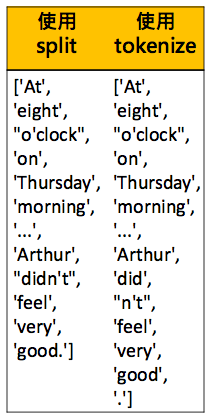

# <span style="color:red ">Types of Tokenizers
   其實有很多不同的分詞器存在
----
• Whitespace tokenizer(空白分詞器): 最簡單的分詞形式。凡碰到 space, tab, or newline character就會做分詞.  
    
• Tweet tokenizer(推特分詞器): 完全針對推特的文章做分詞處理。 It takes care
of all the special characters and emojis used in tweets and returns clean tokens.  
    
• MWE tokenizer: MWE stands for Multi-Word Expression. Here, certain groups
of multiple words are treated as one entity during tokenization, such as "United
States of America," "People's Republic of China," "not only," and "but also." These
predefined groups are added at the beginning with mwe() methods.  
    
• Regular expression tokenizer: These tokenizers are developed using regular
expressions. Sentences are split based on the occurrence of a specific pattern (a
regular expression).  
    
• WordPunctTokenizer: This splits a piece of text into a list of alphabetical and
non-alphabetical characters. It actually splits text into tokens using a fixed
regex, that is, '\w+|[^\w\s]+'.

In [ ]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import MWETokenizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import WordPunctTokenizer

In [ ]:
sentence = '''Sunil tweeted, "Witnessing 70th Republic Day of India from Rajpath, \
              New Delhi. Mesmerizing performance by Indian Army! Awesome airshow! @india_official \
              @indian_army #India #70thRepublic_Day. For more photos ping me sunil@photoking.com :)"
           '''

In [ ]:
def tokenize_with_tweet_tokenizer(text):
    #機器人架起來
    tweet_tokenizer = TweetTokenizer() 
    #作業
    return tweet_tokenizer.tokenize(text) 
    
tokenize_with_tweet_tokenizer(sentence)

#注意一下':)'

In [ ]:
def tokenize_with_mwe(text):
    mwe_tokenizer = MWETokenizer()
    #把希望連字的部分建立起來
    mwe_tokenizer.add_mwe(('Republic', 'Day'))
    mwe_tokenizer.add_mwe(('Indian', 'Army'))
    return mwe_tokenizer.tokenize(text.split())


tokenize_with_mwe(sentence)

#好像有點問題，'Army!'

# <span style="color:red "> <測驗題>

---
我要'Indian_Army'合在一起，但是因為!的關係，被分開了!怎麼辦??幫我處理一下

### <span style="color:red "> <答案>

In [ ]:
tokenize_with_mwe(sentence.replace('!',''))

#  <span style="color:red"> sent_tokenizer
----
    NLTK library裡面一個很重要的工具，
    它是一個事先訓練好的工具，
    它會自動辨別大寫的字和不同類型的標點符號，
    利用這些資訊就可以把Text分成一段一段。

In [ ]:
import nltk
target='''The United States dollar has been weak for most of Donald Trump's presidency. Tax cuts, a bigger deficit and several interest rate cuts from the Federal Reserve have pushed the greenback lower. But even if Trump loses to Joe Biden, the dollar may not dramatically rebound anytime soon.
          A Biden administration would likely push for even more stimulus for consumers and small businesses because of the Covid-19 pandemic -— especially if a blue wave gives Democrats control of the Senate.'''


nltk.sent_tokenize(target)

# <span style="color:red "> <測驗題>

---
CNN找段文字，做一下句子分段，比較一下結果。

### <span style="color:red "> <答案>

In [ ]:
import nltk
target='''But Canadian officials are the first to admit that the vaccine rollout will not be as widespread 
      as in the United States or the United Kingdom because of what they describe as a "fiercely competitive" 
      global scramble for early doses."We are dealing with an incredibly competitive global environment," said Anita Anand,
      Canada's minister of procurement at a news conference Monday, adding, "We've been able to negotiate hard, 
      with fortitude, to bring early doses into this country."While Trudeau told Canadians last week that the 
      country would receive 249,000 doses before year's end, Anand made it clear the number could actually be 
      less than half that.
       '''


for i in nltk.sent_tokenize(target):
    print(i)

# <span style="color:red ">詞幹提取-Stemming
----
    “production,” “products,” 和 “producing”本是同一物
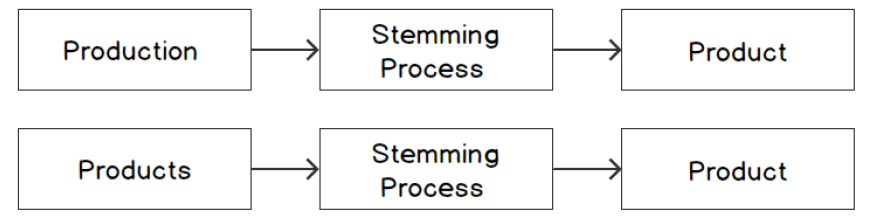
----
## [參考連結](https://xken831.pixnet.net/blog/post/427742999-%5Btextmining%5D-%E5%8E%BB%E5%AD%97%E5%B0%BE%E7%9A%84%E6%96%B9%E6%B3%95-%28stemming%29%EF%BC%8C%E4%BD%BF%E7%94%A8-porter-s)    

In [ ]:
#Porter stemmer 是一個針對英文最常用的詞幹提取器 
from nltk.stem import PorterStemmer
while True:
    word=input('請輸入一個單字')
    if word=='':
        print('謝謝!')
        break
    else:
        st = PorterStemmer()
        print(st.stem(word))

In [ ]:
#先創造一段文字資料
text=['I like fishing','I eat fish','There are many fishes in pound']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

In [ ]:
#Import library
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

### <span style="color:red ">進入下一階段之前，麻煩你再試試Battling這個字，看看詞幹提取的結果

In [ ]:
print(st.stem('Battling'))
#只能提取，沒辦法還原

# <span style="color:red ">詞形還原-Lemmatizing
----
   詞形還原（Lemmatization）是文本處理中的重要部分，與詞幹提取（stemming）很相似。  
   簡單說來，詞形還原就是去掉單詞的詞綴，提取單詞的主幹部分，通常提取後的單詞會是字典中的單詞，  
   單詞“ cars”的詞形還原後的單詞為“ car”，單詞“ ate”詞形的還原後的單詞為“ eat”。  
   這可以避免掉Stemming結果不全的問題

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('men', 'n'))

# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

In [ ]:
#先創造一段文字資料
text=['I like fishing','I eat fish','There are many fishes in pound', 'leaves and leaf']
#convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet':text})
df

In [ ]:
from nltk.stem import WordNetLemmatizer 
#透過詞形還原，可以把資料整理的更好
lemmatizer = WordNetLemmatizer()
df['tweet'] = df['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
df['tweet']

# <span style="color:red ">詞性標記-Parts-of-Speech (PoS) tagging
----
    'He planted the evidence for the case'
    'He planted five trees in the garden.'
    
----
## [參考連結](https://www.itread01.com/content/1541479693.html)  
## [詞性分類說明](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/)

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [ ]:
from nltk import word_tokenize, pos_tag

In [ ]:
def get_tokens(sentence):
    words = word_tokenize(sentence)
    return words

In [ ]:
words = get_tokens("I am reading NLP Fundamentals")
print(words)

In [ ]:
def get_pos(words):
    return pos_tag(words)
get_pos(words)

PRP stands for personal pronoun(人稱代詞)

---
VBP stands for verb present(動詞)

---
VBG stands for verb gerund (動名詞)

---
NNP stands for proper noun singular(單數專有名詞)

---

NNS stands for noun plural(複數名詞)

# <span style="color:red ">實體辨識-Named Entity Recognition (NER)
----
   目標為擷取文字資料中指向實體（entities）的文字區塊，  
   例如：人名、地名、組織名，在生醫領域中也可能是藥品名、分子式等等。  
   NER 讓機器能自動找尋文本中提到的我們感興趣的實體，例如公眾人物等，並加以分析，其產出亦作為人工智慧理解自然語言的重要資訊。  


In [1]:
from nltk import download
from nltk import pos_tag
from nltk import ne_chunk
from nltk import word_tokenize
#下載辨識模型
download('maxent_ne_chunker')
download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\linkindman\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\linkindman\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [2]:
sentence="We are reading a book published by Packt which is based out of Birmingham."
def get_ner(text):
    i = ne_chunk(pos_tag(word_tokenize(text)))
    return [a for a in i if len(a)==1]
get_ner(sentence)

[Tree('PERSON', [('Packt', 'NNP')]), Tree('GPE', [('Birmingham', 'NNP')])]

# <span style="color:red "> <測驗題>

---
CNN找段文字，試一下上面的實體辨識，比較一下結果。

### <span style="color:red "> <答案>

In [3]:
sentence='''
          Within minutes of the first doses of the Pfizer/BioNTech vaccine landing in Canada on Sunday night, Trudeau tweeted a picture of the aircraft's precious cargo but noted "our fight against COVID-19 is not over."
         '''
def get_ner(text):
    i = ne_chunk(pos_tag(word_tokenize(text)))
    return [a for a in i if len(a)==1]
get_ner(sentence)

[Tree('GPE', [('Canada', 'NNP')]), Tree('PERSON', [('Trudeau', 'NNP')])]

# <span style="color:red ">詞義消歧-Word Sense Disambiguation
一個Bank到底有幾種意思?
----
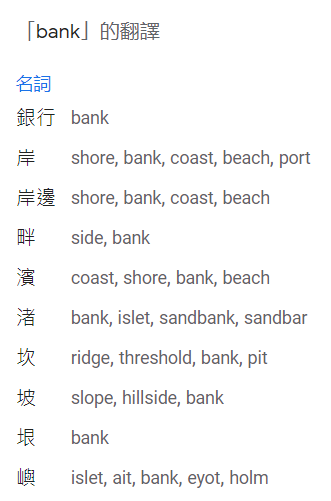

In [ ]:
from nltk.wsd import lesk
from nltk import word_tokenize

In [ ]:
sentence1 = "Keep your savings in the bank"
sentence2 = "It's so risky to drive over the banks of the road"

In [ ]:
def get_synset(sentence, word):
    return lesk(word_tokenize(sentence), word)

In [ ]:
get_synset(sentence1,'bank')

In [ ]:
get_synset(sentence2,'bank')

## [上面的輸出結果到底是什麼意思](http://www.nltk.org/howto/wsd.html)

# <span style="color:red ">文字資料探索-Exploring Text Data
----
### [語料庫](https://ithelp.ithome.com.tw/articles/10202481)

In [4]:
import nltk
from nltk.corpus import webtext
#下載語料庫
nltk.download('webtext')
#以句為單位分割
wt_sentences = webtext.sents('firefox.txt')
#以字為單位分割
wt_words = webtext.words('firefox.txt')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\linkindman\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [5]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [6]:
#多少個句子
len(wt_sentences)

1142

In [7]:
#多少個字
len(wt_words)

102457

In [8]:
frequency_dist = nltk.FreqDist(wt_words)
frequency_dist

FreqDist({'.': 2428, 'in': 2203, 'to': 2130, '"': 1971, 'the': 1762, "'": 1507, 'not': 1472, '-': 1372, 'when': 1255, 'on': 1193, ...})

In [9]:
frequency_dist.items()

dict_items([('Cookie', 22), ('Manager', 179), (':', 466), ('"', 1971), ('Don', 21), ("'", 1507), ('t', 964), ('allow', 53), ('sites', 63), ('that', 145), ('set', 109), ('removed', 21), ('cookies', 57), ('to', 2130), ('future', 4), ('should', 461), ('stay', 21), ('checked', 22), ('When', 132), ('in', 2203), ('full', 38), ('screen', 101), ('mode', 51), ('Pressing', 9), ('Ctrl', 96), ('-', 1372), ('N', 1), ('open', 479), ('a', 1172), ('new', 429), ('browser', 392), ('when', 1255), ('only', 139), ('download', 297), ('dialog', 330), ('is', 1016), ('left', 75), ('add', 93), ('icons', 106), ('context', 104), ('menu', 462), ('So', 1), ('called', 16), ('tab', 456), ('bar', 458), ('be', 376), ('made', 16), ('proper', 6), ('toolbar', 364), ('or', 274), ('given', 15), ('the', 1762), ('ability', 25), ('collapse', 15), ('/', 237), ('expand', 29), ('.', 2428), ('[', 156), ('XUL', 13), (']', 189), ('Implement', 25), ('Cocoa', 1), ('style', 40), ('customization', 16), ('#', 13), ('ifdefs', 3), ('for', 

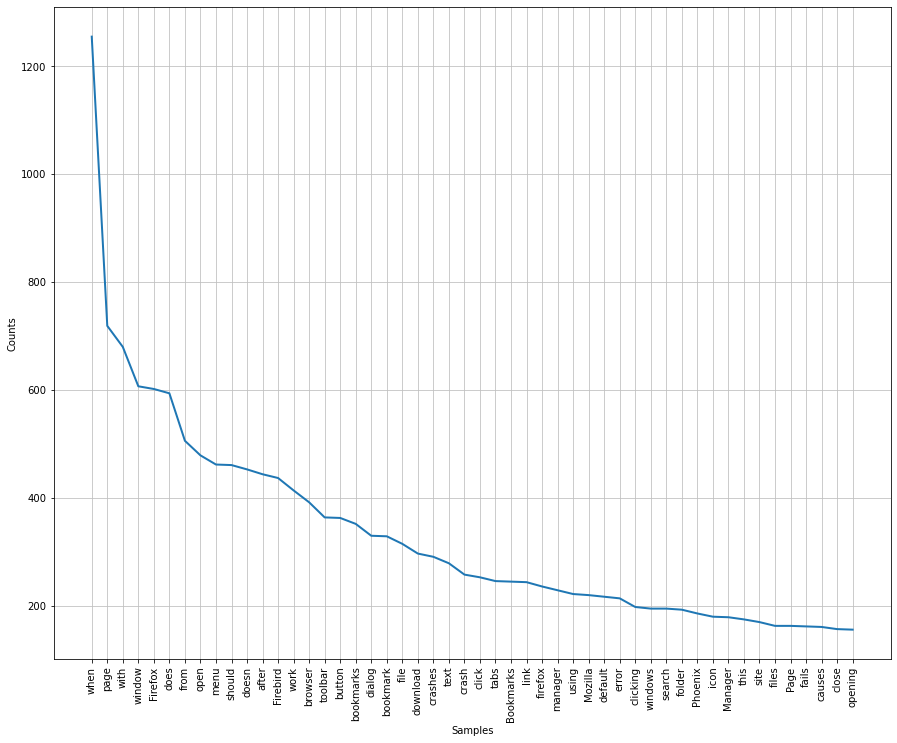

In [10]:
import matplotlib.pyplot as plt

#len(k)>3將協助我們把字挑出來
large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3])
frequency_dist = nltk.FreqDist(large_words)
plt.figure(figsize=(15,12))
#挑最前面的50個字出來
frequency_dist.plot(50,cumulative=False)

### 安裝一下工具

In [ ]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud
#把這朵雲的基礎做出來
#下面的width=1600, height=800是設定解析度
wcloud = WordCloud(background_color='white',width=1600, height=800).generate_from_frequencies(frequency_dist)

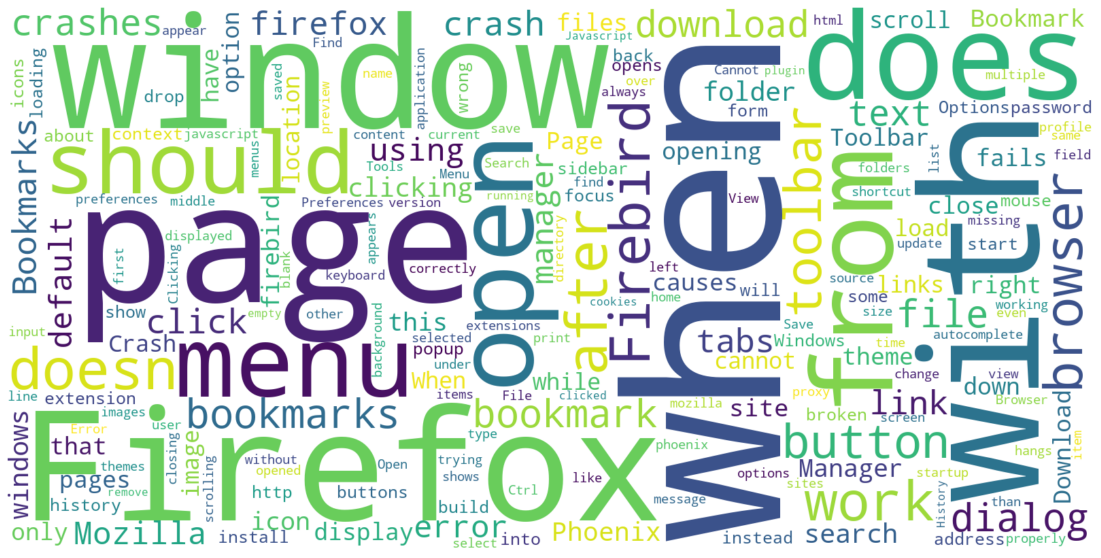

In [12]:
#plotting the wordcloud
import matplotlib.pyplot as plt
plt.figure( figsize=(20,10) )
#把這張圖秀出來
#Display data as an image
#interpolation method 插值法
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# <span style="color:red "> <測驗題>

---
麻煩把stop word去除後，再畫一次

### <span style="color:red "> <答案>

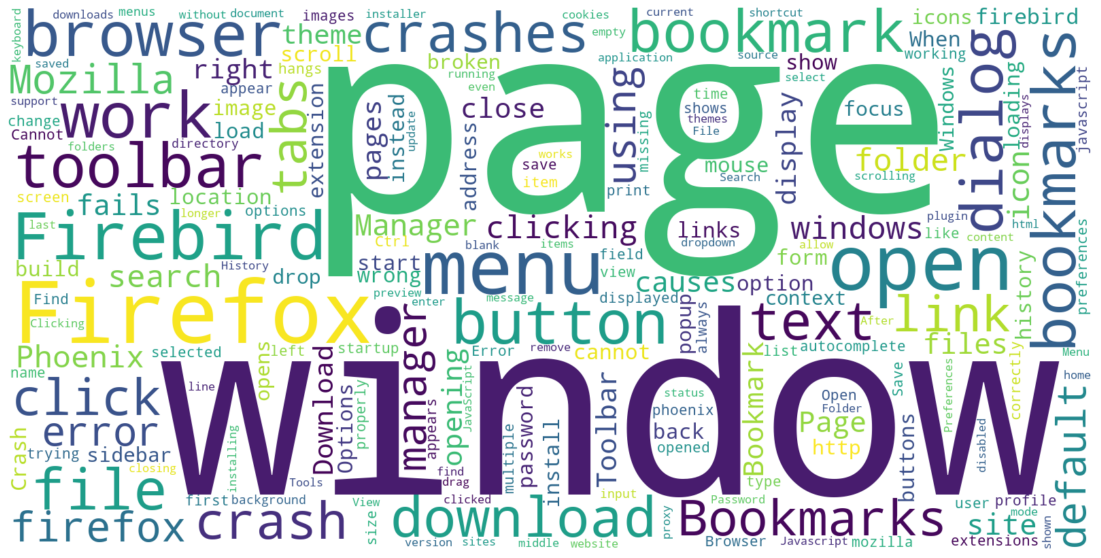

In [13]:
from nltk.corpus import stopwords
#remove stop words
stop = stopwords.words('english')

large_words = dict([(k,v) for k,v in frequency_dist.items() if len(k)>3 and k not in stop])
frequency_dist = nltk.FreqDist(large_words)
wcloud = WordCloud(background_color='white',width=1600, height=800).generate_from_frequencies(frequency_dist)

plt.figure( figsize=(20,10) )
#把這張圖秀出來
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# <span style="color:red ">建立標準處理流程-Building a Text Preprocessing Pipeline

In [14]:
#你可以透過一個Func來把整個處理流程寫好

tweet_sample= """
                How to take control of your #debt https://personal.vanguard.com/us/insights/saving-investing/debt-management.
                #Best advice for #family #financial #success (@PrepareToWin)"
              """
def processRow(row):
    
    import re
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    from nltk.util import ngrams
    import re
    from nltk.tokenize import word_tokenize
    
    tweet = row
    #全部改小寫
    tweet.lower()

    #直接把網址改成URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #把 @Username 轉成 "AT_USER"
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #去掉多餘的空格
    tweet = re.sub('[\s]+', ' ', tweet)
    tweet = re.sub('[\n]+', ' ', tweet)
    #去除一些符號
    tweet = re.sub(r'[^\w]', ' ', tweet)
    #將 #word 替代成 word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #移除 :( or :)
    tweet = tweet.replace(':)','')
    tweet = tweet.replace(':(','')
    #remove numbers
    tweet = ''.join([i for i in tweet if not i.isdigit()]) 
   
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    tweet =" ".join([lemmatizer.lemmatize(word) for word in tweet.split()])

    row = tweet

    return row

#call the function with your data
processRow(tweet_sample)

'How to take control of your debt URL Best advice for family financial success AT_USER'